In [7]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import cv2


In [8]:
from matplotlib.pyplot import imread

heart = imread(r'mask.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(heart, thresh=180, maxval=255, type=cv2.THRESH_BINARY)

FileNotFoundError: [Errno 2] No such file or directory: 'mask.jpg'

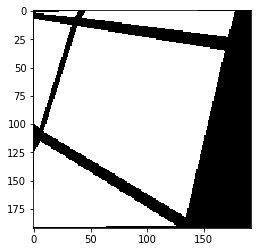

In [23]:
temple_x, temple_y, _ = temple.shape
heart_x, heart_y = mask.shape

x_heart = min(temple_x, heart_x)
x_half_heart = mask.shape[0]//2

heart_mask = mask[x_half_heart-x_heart//2 : x_half_heart+x_heart//2+1, :temple_y]
plt.imshow(heart_mask, cmap='Greys_r')

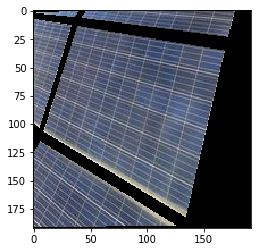

In [24]:
temple_width_half = temple.shape[1]//2
temple_to_mask = temple[:,temple_width_half-x_half_heart:temple_width_half+x_half_heart]
masked = cv2.bitwise_and(temple_to_mask,temple_to_mask,mask = heart_mask)
plt.imshow(masked)

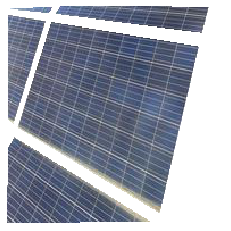

In [25]:
tmp = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(masked)
rgba = [b,g,r, alpha]
masked_tr = cv2.merge(rgba,4)

plt.axis('off')
plt.imshow(masked_tr)